## Intial analysis of water data collected in Alicante

In [1]:
import os
import sys
import math
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statistics import mean

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from modules import water_monitoring

In [2]:
instance = water_monitoring.WaterMonitoringInstance()
instance.read_data("../data/Benalua Consumption/Benalua 2018.csv", ";")
instance.transform_data("alicante", True)
instance.make_time_features("CA009-52")

data = instance.get_data_frame()
data

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning:

Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.



,CA009-52,Data-1(Sensor1),Data-2(Sensor1),Minute,Hour,Day,Month,Year
0,2017-12-31 14:03:06,87,32674,3,14,31,12,2017
1,2017-12-31 14:03:37,88,2,3,14,31,12,2017
2,2017-12-31 14:04:08,87,71754,4,14,31,12,2017
3,2017-12-31 14:04:38,85,24913,4,14,31,12,2017
4,2017-12-31 14:05:09,91,43427,5,14,31,12,2017
...,...,...,...,...,...,...,...,...
1009536,2018-12-31 14:00:30,53,24363,0,14,31,12,2018
1009537,2018-12-31 14:01:01,51,78352,1,14,31,12,2018
1009538,2018-12-31 14:01:32,54,75373,1,14,31,12,2018
1009539,2018-12-31 14:02:03,57,58125,2,14,31,12,2018


In [3]:
subset_data = instance.take_data_in_range("2018-05-13 10:30:00", "2018-07-13 10:30:00", "CA009-52")
subset_data

,CA009-52,Data-1(Sensor1),Data-2(Sensor1),Minute,Hour,Day,Month,Year
365992,2018-05-13 10:30:31,75,26133,30,10,13,5,2018
365993,2018-05-13 10:31:02,79,45072,31,10,13,5,2018
365994,2018-05-13 10:31:33,83,18584,31,10,13,5,2018
365995,2018-05-13 10:32:04,84,914,32,10,13,5,2018
365996,2018-05-13 10:32:35,83,34975,32,10,13,5,2018
...,...,...,...,...,...,...,...,...
535151,2018-07-13 10:27:43,71,53503,27,10,13,7,2018
535152,2018-07-13 10:28:15,70,58823,28,10,13,7,2018
535153,2018-07-13 10:28:46,72,60207,28,10,13,7,2018
535154,2018-07-13 10:29:17,69,60833,29,10,13,7,2018


In [4]:
# coef_arr = instance.calculate_correlation("Data-1(Sensor1)")
# instance.get_nan_rows()

In [5]:
analyzer = water_monitoring.Analyzer(subset_data)
y_test, y_pred, time = analyzer.random_forest(["Data-2(Sensor1)", "Hour"], "Data-1(Sensor1)", "CA009-52")

Random forest regression R2:  0.8593230828437091
MSE result: 58.03168751205228


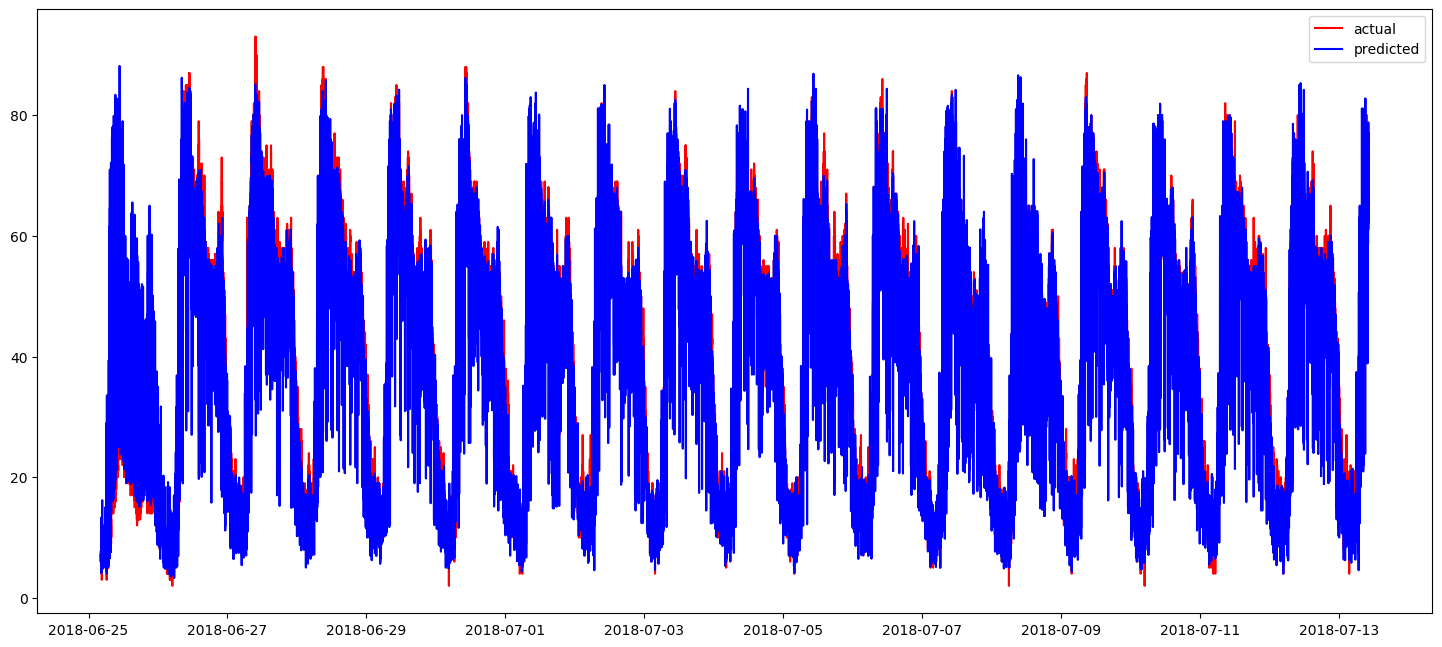

In [6]:
"""fig = px.line(data, x="CA009-52", y="Data-1(Sensor1)", height=600)
fig.show()""";
fig = plt.figure(figsize=(18, 8), dpi=100, facecolor='w')

plt.plot(time, y_test, color="red", label="actual")
plt.plot(time, y_pred, color="blue", label="predicted")

plt.legend()
plt.show()

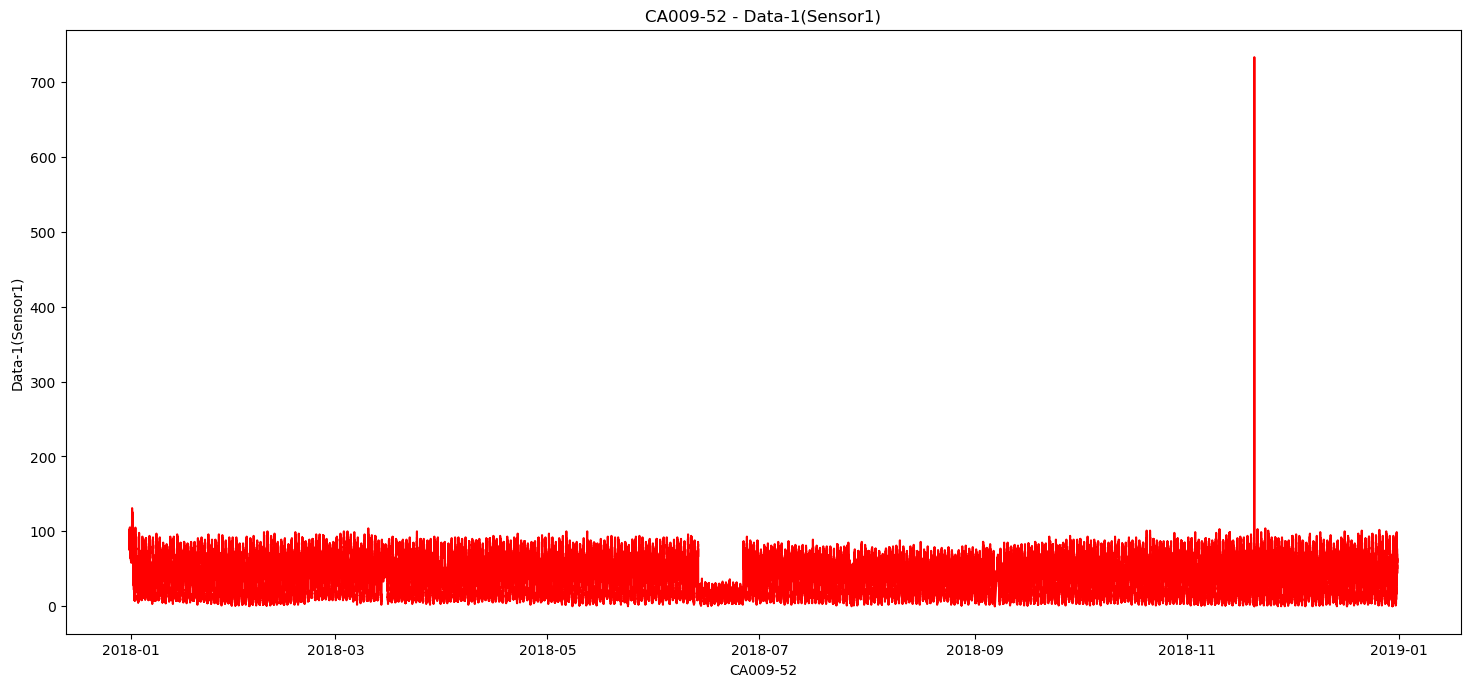

In [7]:
instance.plot_two_columns("CA009-52", "Data-1(Sensor1)")

In [8]:
# instance.interactive_two_columns_plot("CA009-52", "Data-1(Sensor1)")